In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Olx_data.csv') 

copy = df.copy()

In [3]:
df.head()

,Title,Price,Location,Published,Category
0,Кислородный Конц Аренда,3 000 тг.,"Нур-Султан (Астана), Есильский район",дек. 4,elektronika
1,Кислородный Конц Аренда 5 литр,3 000 тг.,Петропавловск,13:15 Сегодня,elektronika
2,Калонка Аренда Lg Cj 98 3500W RMS Жалға беріледі,6 000 тг.,"Шымкент, Абайский район",дек. 4,elektronika
3,"Аренда пушка газовая, прокат пушек в Шымкенте,...",2 000 тг.,"Шымкент, Абайский район",01:05 Вчера,elektronika
4,"Музыкальная аппаратура, караоке аренда",8 500 тг.,"Актобе, Старый город",21:17 Вчера,elektronika


In [4]:
copy.head()

,Title,Price,Location,Published,Category
0,Кислородный Конц Аренда,3 000 тг.,"Нур-Султан (Астана), Есильский район",дек. 4,elektronika
1,Кислородный Конц Аренда 5 литр,3 000 тг.,Петропавловск,13:15 Сегодня,elektronika
2,Калонка Аренда Lg Cj 98 3500W RMS Жалға беріледі,6 000 тг.,"Шымкент, Абайский район",дек. 4,elektronika
3,"Аренда пушка газовая, прокат пушек в Шымкенте,...",2 000 тг.,"Шымкент, Абайский район",01:05 Вчера,elektronika
4,"Музыкальная аппаратура, караоке аренда",8 500 тг.,"Актобе, Старый город",21:17 Вчера,elektronika


In [5]:
# Remove unneccessary rows

copy = copy[~copy['Published'].isin( ['занятость Частичная', 'работа временная', 'занятость Полная']) ]

In [6]:
# Next need to split Published column to Time and Day columns

copy['Time'] = copy['Published'].apply(lambda x: x.split(' ')[0])
copy['Day'] = copy['Published'].apply(lambda x: x.split(' ')[1])

In [7]:
copy['Month'] = 'Current'

In [8]:
nov =  (~copy['Time'].isin(['дек.'])) & (~copy['Day'].isin(['Сегодня', 'Вчера'])) 

copy.loc[nov, 'Time'] = '00:00'
copy.loc[nov, 'Month'] = 'November'

In [9]:
dec =  (copy['Time'].isin(['дек.'])) | (copy['Day'].isin(['Сегодня', 'Вчера'])) 

copy.loc[copy['Time'].isin(['дек.']), 'Time'] = '12:00'

copy.loc[copy['Day'] == 'Сегодня', 'Day'] = '6'
copy.loc[copy['Day'] == 'Вчера', 'Day'] = '5'

copy.loc[ copy['Month'] == 'Current', 'Month'] = 'December'

In [10]:
copy.drop('Published', axis = 1,inplace = True)

In [11]:
copy

,Title,Price,Location,Category,Time,Day,Month
0,Кислородный Конц Аренда,3 000 тг.,"Нур-Султан (Астана), Есильский район",elektronika,12:00,4,December
1,Кислородный Конц Аренда 5 литр,3 000 тг.,Петропавловск,elektronika,13:15,6,December
2,Калонка Аренда Lg Cj 98 3500W RMS Жалға беріледі,6 000 тг.,"Шымкент, Абайский район",elektronika,12:00,4,December
3,"Аренда пушка газовая, прокат пушек в Шымкенте,...",2 000 тг.,"Шымкент, Абайский район",elektronika,01:05,5,December
4,"Музыкальная аппаратура, караоке аренда",8 500 тг.,"Актобе, Старый город",elektronika,21:17,5,December
...,...,...,...,...,...,...,...
32364,Торты на заказ любой сложности,NaN,"Алматы, Бостандыкский район",uslugi,12:58,6,December
32365,"Скульптура, памятник, монумент, фигуры животны...",NaN,Туркестан,uslugi,12:57,6,December
32366,"Скульптура, памятник, бюст, монумент, фигуры ж...",NaN,"Талдыкорган, Микрорайон 1",uslugi,12:57,6,December
32367,"Скульптура, памятник, бюст, монумент, фигуры ж...",NaN,Балхаш,uslugi,12:56,6,December


In [12]:
check = pd.DataFrame({'name':['Julia', 'Camile', 'Rose', 'Julia'], 
                      'education': ['High', 'Middle', 'Unknown', 'High'], 
                      'status': [1, 0, 0, 1],
                     'salary': [14000, 25000, 13000, 50000]})

In [13]:
copy['Location'] = copy['Location'].apply(lambda x: x.split(',')[0])

In [14]:
copy.drop_duplicates(inplace= True)

### CLean data

In [15]:
copy['Price'].replace(['Бесплатно', 'Обмен'], '0 тг.', inplace = True)

In [16]:
int('3 000 000'.replace(' ', ''))

3000000

In [17]:
int('3 000 000 тг.'.split(' тг.')[0].replace(' ', ''))

3000000

In [18]:
copy['Price'].fillna(0, inplace = True)

In [19]:
copy["Price"]

0        3 000 тг.
1        3 000 тг.
2        6 000 тг.
3        2 000 тг.
4        8 500 тг.
           ...    
32325            0
32326            0
32327            0
32328            0
32329            0
Name: Price, Length: 9937, dtype: object

In [20]:
copy['Price'] = copy['Price'].apply(lambda x: float(str(x).split('тг.')[0].replace(' ', '')))

In [21]:
copy['Price']

0        3000.0
1        3000.0
2        6000.0
3        2000.0
4        8500.0
          ...  
32325       0.0
32326       0.0
32327       0.0
32328       0.0
32329       0.0
Name: Price, Length: 9937, dtype: float64

In [22]:
copy['Day'] = copy['Day'].astype('int')

In [23]:
copy.loc[copy['Price'] == copy['Price'].max()]

,Title,Price,Location,Category,Time,Day,Month
15271,"Казино в Рино-Спаркс, штат Невада.",5.184000e+10,Нур-Султан (Астана),nedvizhimost,09:40,5,December


In [24]:
copy.dtypes

Title        object
Price       float64
Location     object
Category     object
Time         object
Day           int32
Month        object
dtype: object

In [25]:
copy.head()

,Title,Price,Location,Category,Time,Day,Month
0,Кислородный Конц Аренда,3000.0,Нур-Султан (Астана),elektronika,12:00,4,December
1,Кислородный Конц Аренда 5 литр,3000.0,Петропавловск,elektronika,13:15,6,December
2,Калонка Аренда Lg Cj 98 3500W RMS Жалға беріледі,6000.0,Шымкент,elektronika,12:00,4,December
3,"Аренда пушка газовая, прокат пушек в Шымкенте,...",2000.0,Шымкент,elektronika,01:05,5,December
4,"Музыкальная аппаратура, караоке аренда",8500.0,Актобе,elektronika,21:17,5,December


### Need to add regions

In [26]:
copy['Location'].replace('Нур-Султан (Астана)', 'Нур-Султан', inplace = True)

copy['Location'].replace('Алматы', 'Алма-Ата (Алматы)', inplace = True)

In [27]:
# We need to parse all data about regions and cities and villages from wikipedia

In [28]:
import requests


In [29]:
url = "https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D0%BE%D0%B2_%D0%9A%D0%B0%D0%B7%D0%B0%D1%85%D1%81%D1%82%D0%B0%D0%BD%D0%B0_%D0%BF%D0%BE_%D1%87%D0%B8%D1%81%D0%BB%D0%B5%D0%BD%D0%BD%D0%BE%D1%81%D1%82%D0%B8_%D0%BD%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F"

r = requests.get(url)
df_list = pd.read_html(r.text) # this parses all the tables in webpages to a list
cities = df_list[0]


In [30]:
cities[cities['Русское название города'].isin(copy['Location'].unique())]

,Место,Русское название города,Казахское название города,Область,1970,1979,1989,1999,2009,Население(1 января 2020)[2]
0,1,Алма-Ата (Алматы),Алматы,—,NaN,956817.0,1071927.0,1129356 (1130621),1365632.0,1 916 822
1,2,Нур-Султан,Нұр-Сұлтан,—,NaN,228481.0,276003.0,312965 (328341),613006.0,1 136 156
2,3,Шымкент,Шымкент,—,NaN,318407.0,380091.0,360078 (423902),603499.0,1 038 152
3,4,Актобе,Ақтөбе,Актюбинская,NaN,190276.0,252978.0,253088,345687.0,500 757
4,5,Караганда,Қарағанды,Карагандинская,NaN,566776.0,507318.0,436864,459778.0,497 777
...,...,...,...,...,...,...,...,...,...,...
76,77,Каркаралинск,Қарқаралы,Карагандинская,NaN,NaN,NaN,NaN,NaN,8 171
77,78,Каражал,Қаражал,Карагандинская,NaN,NaN,NaN,NaN,NaN,7 935
78,79,Булаево,Булаев,Северо-Казахстанская,NaN,NaN,NaN,NaN,NaN,7 722
83,84,Державинск,Державин,Акмолинская,NaN,NaN,NaN,7869,6309.0,5 789


In [31]:
copy[copy['Location'].isin(cities['Русское название города'])]

,Title,Price,Location,Category,Time,Day,Month
0,Кислородный Конц Аренда,3000.0,Нур-Султан,elektronika,12:00,4,December
1,Кислородный Конц Аренда 5 литр,3000.0,Петропавловск,elektronika,13:15,6,December
2,Калонка Аренда Lg Cj 98 3500W RMS Жалға беріледі,6000.0,Шымкент,elektronika,12:00,4,December
3,"Аренда пушка газовая, прокат пушек в Шымкенте,...",2000.0,Шымкент,elektronika,01:05,5,December
4,"Музыкальная аппаратура, караоке аренда",8500.0,Актобе,elektronika,21:17,5,December
...,...,...,...,...,...,...,...
32325,Приём чёрного и цветного металла дорого,0.0,Шымкент,uslugi,12:00,4,December
32326,Услуги Автовышки 18 метров,0.0,Шымкент,uslugi,12:00,1,December
32327,Чистка дымоходов не дорого,0.0,Семей,uslugi,08:37,5,December
32328,Услуги мини погрузчика,0.0,Нур-Султан,uslugi,12:00,4,December


In [32]:
copy

,Title,Price,Location,Category,Time,Day,Month
0,Кислородный Конц Аренда,3000.0,Нур-Султан,elektronika,12:00,4,December
1,Кислородный Конц Аренда 5 литр,3000.0,Петропавловск,elektronika,13:15,6,December
2,Калонка Аренда Lg Cj 98 3500W RMS Жалға беріледі,6000.0,Шымкент,elektronika,12:00,4,December
3,"Аренда пушка газовая, прокат пушек в Шымкенте,...",2000.0,Шымкент,elektronika,01:05,5,December
4,"Музыкальная аппаратура, караоке аренда",8500.0,Актобе,elektronika,21:17,5,December
...,...,...,...,...,...,...,...
32325,Приём чёрного и цветного металла дорого,0.0,Шымкент,uslugi,12:00,4,December
32326,Услуги Автовышки 18 метров,0.0,Шымкент,uslugi,12:00,1,December
32327,Чистка дымоходов не дорого,0.0,Семей,uslugi,08:37,5,December
32328,Услуги мини погрузчика,0.0,Нур-Султан,uslugi,12:00,4,December


In [33]:
copy['Region'] = 'Default'

In [34]:
def return_region(city):
    try:
        return cities.loc[cities['Русское название города'] == city, 'Область'].values[0]
    except:
        return 'Default'

In [35]:
copy['Region'] = list(map(return_region, copy['Location']))

In [36]:
copy.loc[copy['Region'] == '—', 'Region'] = copy.loc[copy['Region'] == '—', 'Location']

In [37]:
copy.rename({'Location':'City'}, inplace = True)

In [38]:
copy

,Title,Price,Location,Category,Time,Day,Month,Region
0,Кислородный Конц Аренда,3000.0,Нур-Султан,elektronika,12:00,4,December,Нур-Султан
1,Кислородный Конц Аренда 5 литр,3000.0,Петропавловск,elektronika,13:15,6,December,Северо-Казахстанская
2,Калонка Аренда Lg Cj 98 3500W RMS Жалға беріледі,6000.0,Шымкент,elektronika,12:00,4,December,Шымкент
3,"Аренда пушка газовая, прокат пушек в Шымкенте,...",2000.0,Шымкент,elektronika,01:05,5,December,Шымкент
4,"Музыкальная аппаратура, караоке аренда",8500.0,Актобе,elektronika,21:17,5,December,Актюбинская
...,...,...,...,...,...,...,...,...
32325,Приём чёрного и цветного металла дорого,0.0,Шымкент,uslugi,12:00,4,December,Шымкент
32326,Услуги Автовышки 18 метров,0.0,Шымкент,uslugi,12:00,1,December,Шымкент
32327,Чистка дымоходов не дорого,0.0,Семей,uslugi,08:37,5,December,Восточно-Казахстанская
32328,Услуги мини погрузчика,0.0,Нур-Султан,uslugi,12:00,4,December,Нур-Султан


### Analyzing

In [39]:
"""Six questions:
   1. Top categories
   2. We want to publish ad of our website, what time we should make?
   3. Activity of Regions
   4. What people looking for
   5. Describe in 10 words this renting market 
   6. Trying to describe employees (Sum-up)
  """

'Six questions:\n   1. Top categories\n   2. We want to publish ad of our website, what time we should make?\n   3. Activity of Regions\n   4. What people looking for\n   5. Describe in 10 words this renting market \n   6. Trying to describe employees (Sum-up)\n  '

### Top categories

In [40]:
cats = copy.groupby('Category').count()

cats.sort_values(by = ['Title'], ascending = False, inplace = True)

names =  ['Недвижимость', 'Услуги', 'Дом и Сад', 'Электроника', 'Мода и стиль', 'Остальные']

values = [i for i in cats['Title'][:5]]

values.append(sum([i for i in cats['Title'][5:]]))

values

[4100, 3608, 545, 478, 369, 837]

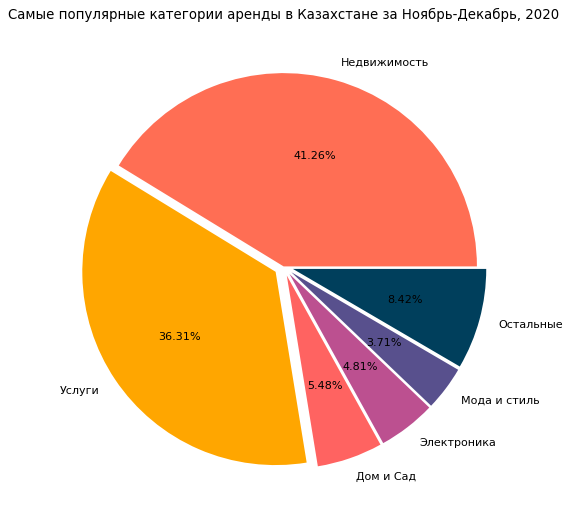

In [41]:
plt.figure(figsize=(8, 8), dpi = 80)



explode = (0, 0.05, 0.05, 0.05, 0.05, 0.05)

cols = ["#003f5c", "#58508d", "#bc5090", "#ff6361", "#ffa600", "#ff6e54"]

plt.title('Самые популярные категории аренды в Казахстане за Ноябрь-Декабрь, 2020')


plt.pie(values, labels = names, explode = explode, colors = cols[::-1], autopct='%1.2f%%')



plt.savefig("top_categories.png", bbox_inches = "tight", pad_inches = 1)

plt.show()




### We want to publish ads of Website, when we should do it?

In [46]:
given_time = copy[~copy['Time'].isin(['00:00', '12:00'])]

In [47]:
given_time

,Title,Price,Location,Category,Time,Day,Month,Region
1,Кислородный Конц Аренда 5 литр,3000.0,Петропавловск,elektronika,13:15,6,December,Северо-Казахстанская
3,"Аренда пушка газовая, прокат пушек в Шымкенте,...",2000.0,Шымкент,elektronika,01:05,5,December,Шымкент
4,"Музыкальная аппаратура, караоке аренда",8500.0,Актобе,elektronika,21:17,5,December,Актюбинская
5,Philips TL 20w/52 Аренда/Продажа фотоламп от ж...,1000.0,Шымкент,elektronika,17:24,6,December,Шымкент
6,Аренда/Прокат фотолампы Philips 20w/52,1000.0,Шымкент,elektronika,16:45,6,December,Шымкент
...,...,...,...,...,...,...,...,...
31929,Отогрев автомобиля,0.0,Темиртау,uslugi,11:17,5,December,Карагандинская
31975,Все виды реклмыОбъемные буквы билборды стенды,0.0,Кызылорда,uslugi,11:15,5,December,Кызылординская
32152,Услуги МАЛЕНЬКОГО Манипулятор,0.0,Алма-Ата (Алматы),uslugi,09:38,5,December,Алма-Ата (Алматы)
32239,Дорожные знаки. Стойки СКМ. Сигнальные столбик...,0.0,Атырау,uslugi,10:47,5,December,Атырауская


In [48]:
given_time['Hour'] = given_time['Time'].apply(lambda x: x.split(':')[0])

<ipython-input-48-7814c6ed11b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  given_time['Hour'] = given_time['Time'].apply(lambda x: x.split(':')[0])


In [67]:
byhour = given_time.groupby('Hour').count()


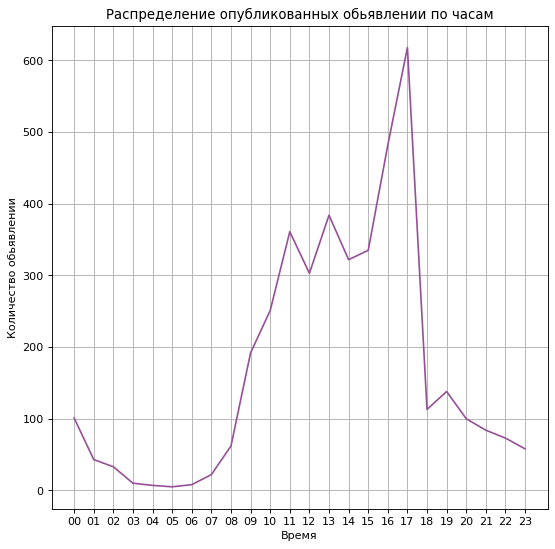

In [68]:
plt.figure(figsize=(8,8), dpi = 80)


plt.title('Распределение опубликованных обьявлении по часам')


plt.plot(byhour.index, byhour['Title'], color = '#955196')


plt.grid()

plt.xlabel('Время')
plt.ylabel('Количество обьявлении')

plt.savefig("byhour.png", bbox_inches = "tight", pad_inches = 1)

plt.show()

plt.close()

### Activity of Regions

In [93]:
defs = copy.loc[copy['Region'] == 'Default']

defs = defs.groupby('Location').count()

defs.sort_values('Title', ascending = False, inplace = True)

defs[defs['Title'] < 5]

,Title,Price,Category,Time,Day,Month,Region
Location,,,,,,,
Балыкши,39,39,39,39,39,39,39
Мичуринское,31,31,31,31,31,31,31
Капчагай,28,28,28,28,28,28,28
Сарыкамыс,27,27,27,27,27,27,27
Каменка,13,13,13,13,13,13,13
Байзак,12,12,12,12,12,12,12
Мангистау,12,12,12,12,12,12,12
Иргели,10,10,10,10,10,10,10
Бурабай,10,10,10,10,10,10,10


In [112]:
copy.loc[copy['Location'] == 'Акжайык', 'Region'] = 'Атырауская'

In [75]:
copy.Region.unique()

array(['Нур-Султан', 'Северо-Казахстанская', 'Шымкент', 'Актюбинская',
       'Алматинская', 'Алма-Ата (Алматы)', 'Жамбылская', 'Мангистауская',
       'Акмолинская', 'Западно-Казахстанская', 'Default', 'Костанайская',
       'Атырауская', 'Карагандинская', 'Восточно-Казахстанская',
       'Кызылординская', 'Туркестанская', 'Павлодарская'], dtype=object)

In [119]:
copy = copy[copy['Region'] != 'Default']

In [120]:
# copy.to_csv('ready_data.csv')

In [2]:
# By reg

copy = pd.read_csv('ready_data.csv')


In [3]:
copy.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
byreg = copy.groupby('Region').count()

byreg

# > 1000, 1000 >  > 500, < 500

,Title,Price,Location,Category,Time,Day,Month
Region,,,,,,,
Акмолинская,191,191,191,191,191,191,191
Актюбинская,412,412,412,412,412,412,412
Алма-Ата (Алматы),2147,2147,2147,2147,2147,2147,2147
Алматинская,339,339,339,339,339,339,339
Атырауская,789,789,789,789,789,789,789
Восточно-Казахстанская,407,407,407,407,407,407,407
Жамбылская,200,200,200,200,200,200,200
Западно-Казахстанская,347,347,347,347,347,347,347
Карагандинская,1035,1035,1035,1035,1035,1035,1035


In [7]:
cat_reg = copy.groupby(['Category', 'Region']).count().sort_values('Title', ascending = False)

In [20]:
cat_reg.reset_index('Region', inplace = True)

In [26]:
for i in copy.Region.unique():
    print(cat_reg[cat_reg['Region'] == i].Title, i)
    
# green nedvizh. red uslugi 

Category
uslugi                 769
nedvizhimost           646
dom-i-sad              100
elektronika             75
hobbi-otdyh-i-sport     59
detskiy-mir             40
moda-i-stil             36
transport               17
zhivotnye                9
Name: Title, dtype: int64 Нур-Султан
Category
nedvizhimost           75
uslugi                 57
detskiy-mir            19
moda-i-stil            15
transport              10
dom-i-sad               8
elektronika             5
hobbi-otdyh-i-sport     4
zhivotnye               2
Name: Title, dtype: int64 Северо-Казахстанская
Category
nedvizhimost           290
uslugi                 250
elektronika             28
dom-i-sad               27
hobbi-otdyh-i-sport     13
transport               10
moda-i-stil              9
zhivotnye                6
detskiy-mir              4
Name: Title, dtype: int64 Шымкент
Category
uslugi                 172
nedvizhimost           136
dom-i-sad               27
elektronika             23
detskiy-mir       

### 5. Describe in 10 words this renting market 

In [4]:
l = list(copy['Title'].apply(lambda x: x.lower().split(' ')))

In [5]:
import collections

In [15]:
defdict = collections.defaultdict(l)

TypeError: first argument must be callable or None

In [6]:
c = collections.Counter()

In [7]:
for i in range(len(l)):
    for j in range(len(l[i])):
        c[l[i][j]]+=1

In [8]:
type(c)

collections.Counter

In [12]:
c.most_common(120)

[('аренда', 4090),
 ('в', 3359),
 ('аренду', 2430),
 ('сдам', 1448),
 ('на', 743),
 ('и', 710),
 ('прокат', 528),
 ('с', 415),
 ('ps4', 408),
 ('продам', 383),
 ('дом', 371),
 ('для', 368),
 ('', 355),
 ('услуги', 323),
 ('по', 278),
 ('авто', 276),
 ('playstation', 270),
 ('сдается', 253),
 ('4', 242),
 ('квартира', 238),
 ('квартиры', 215),
 ('посуточно', 212),
 ('от', 206),
 ('prokat', 206),
 ('arenda', 202),
 ('гараж', 198),
 ('или', 194),
 ('под', 173),
 ('помещение', 161),
 ('2', 157),
 ('sony', 156),
 ('без', 154),
 ('1', 151),
 ('квартиру', 144),
 ('алматы', 143),
 ('/', 141),
 ('дома', 128),
 ('долгосрочная', 125),
 ('доставка', 121),
 ('аренда,', 115),
 (',', 108),
 ('квартир', 108),
 ('сдаётся', 107),
 ('пс4', 104),
 ('комнату', 98),
 ('стол', 97),
 ('погрузчика', 97),
 ('ps', 96),
 ('участок', 95),
 ('4,', 93),
 ('сутки', 91),
 ('-', 88),
 ('комнаты', 88),
 ('продажа', 87),
 ('коттедж', 87),
 ('ремонт', 86),
 ('центре', 86),
 ('ps4,', 84),
 ('срок', 83),
 ('пассажирские', 8

In [10]:
ps = ['ps4', 'soni', 'ps', 'playstation', 'пс4']
kv = ['комнатная', 'кв', 'ком', 'комнатную', 'комнаты', 'квартира', 'квартиры']



In [11]:
ps_sum = sum(c[i] for i in ps)
kv_sum = sum(c[i] for i in kv)

In [18]:
droping = [ 'квартира', 'квартиры', 'посуточно', 'комнатная', 'кв', 'ком', 'комнатную', 'комнаты',
           'ps4', 'soni', 'ps', 'playstation', 
           'пс4','на', 'и', '', 'по', '4', 'или', 'под', '2', 'без']

In [19]:
for i in droping:
    c.pop(i)

In [13]:
c['rampage'] = 10000

In [24]:
c.most_common(130)

[('rampage', 10000),
 ('аренда', 4090),
 ('аренду', 2430),
 ('сдам', 1448),
 ('прокат', 528),
 ('с', 415),
 ('продам', 383),
 ('дом', 371),
 ('для', 368),
 ('услуги', 323),
 ('авто', 276),
 ('сдается', 253),
 ('от', 206),
 ('prokat', 206),
 ('arenda', 202),
 ('гараж', 198),
 ('помещение', 161),
 ('sony', 156),
 ('1', 151),
 ('квартиру', 144),
 ('алматы', 143),
 ('/', 141),
 ('дома', 128),
 ('долгосрочная', 125),
 ('доставка', 121),
 ('аренда,', 115),
 (',', 108),
 ('квартир', 108),
 ('сдаётся', 107),
 ('комнату', 98),
 ('стол', 97),
 ('погрузчика', 97),
 ('участок', 95),
 ('4,', 93),
 ('сутки', 91),
 ('-', 88),
 ('продажа', 87),
 ('коттедж', 87),
 ('ремонт', 86),
 ('центре', 86),
 ('ps4,', 84),
 ('срок', 83),
 ('пассажирские', 83),
 ('3', 80),
 ('времянка', 79),
 ('аренда.', 78),
 ('тг', 77),
 ('газель', 75),
 ('место', 72),
 ('времянку', 71),
 ('сдаю', 70),
 ('помещения', 69),
 ('долгосрочную', 69),
 ('леса', 67),
 ('аренду.', 66),
 ('комната', 65),
 ('.', 64),
 ('за', 64),
 ('микроав

In [23]:
ps_sum

925

In [25]:
copy

,Title,Price,Location,Category,Time,Day,Month,Region
0,Кислородный Конц Аренда,3000.0,Нур-Султан,elektronika,12:00,4,December,Нур-Султан
1,Кислородный Конц Аренда 5 литр,3000.0,Петропавловск,elektronika,13:15,6,December,Северо-Казахстанская
2,Калонка Аренда Lg Cj 98 3500W RMS Жалға беріледі,6000.0,Шымкент,elektronika,12:00,4,December,Шымкент
3,"Аренда пушка газовая, прокат пушек в Шымкенте,...",2000.0,Шымкент,elektronika,01:05,5,December,Шымкент
4,"Музыкальная аппаратура, караоке аренда",8500.0,Актобе,elektronika,21:17,5,December,Актюбинская
...,...,...,...,...,...,...,...,...
9693,Приём чёрного и цветного металла дорого,0.0,Шымкент,uslugi,12:00,4,December,Шымкент
9694,Услуги Автовышки 18 метров,0.0,Шымкент,uslugi,12:00,1,December,Шымкент
9695,Чистка дымоходов не дорого,0.0,Семей,uslugi,08:37,5,December,Восточно-Казахстанская
9696,Услуги мини погрузчика,0.0,Нур-Султан,uslugi,12:00,4,December,Нур-Султан


 ### Summary

In [26]:
has_price = copy[copy['Price'] != 0]

In [27]:
has_price

,Title,Price,Location,Category,Time,Day,Month,Region
0,Кислородный Конц Аренда,3000.0,Нур-Султан,elektronika,12:00,4,December,Нур-Султан
1,Кислородный Конц Аренда 5 литр,3000.0,Петропавловск,elektronika,13:15,6,December,Северо-Казахстанская
2,Калонка Аренда Lg Cj 98 3500W RMS Жалға беріледі,6000.0,Шымкент,elektronika,12:00,4,December,Шымкент
3,"Аренда пушка газовая, прокат пушек в Шымкенте,...",2000.0,Шымкент,elektronika,01:05,5,December,Шымкент
4,"Музыкальная аппаратура, караоке аренда",8500.0,Актобе,elektronika,21:17,5,December,Актюбинская
...,...,...,...,...,...,...,...,...
6836,"Емкость, цистерна 15 кубов , асенизатор",850000.0,Алма-Ата (Алматы),uslugi,00:00,30,November,Алма-Ата (Алматы)
6837,Продам действующий бизнес с оборудованием,10000000.0,Алма-Ата (Алматы),uslugi,12:00,4,December,Алма-Ата (Алматы)
6841,"Станок для производства кирпича, шлакоблока, п...",30000.0,Петропавловск,uslugi,12:00,4,December,Северо-Казахстанская
6843,Продам 1 кат СМР с фин.устойчивостью по госзак...,30000000.0,Актобе,uslugi,00:00,11,November,Актюбинская


In [34]:
has_price.groupby('Region').median()['Price']

Region
Акмолинская               40000.0
Актюбинская               20000.0
Алма-Ата (Алматы)         35000.0
Алматинская               35000.0
Атырауская                40000.0
Восточно-Казахстанская    20000.0
Жамбылская                25000.0
Западно-Казахстанская     30000.0
Карагандинская             7000.0
Костанайская              15000.0
Кызылординская            25000.0
Мангистауская             25000.0
Нур-Султан                35000.0
Павлодарская              18500.0
Северо-Казахстанская      20000.0
Туркестанская             40000.0
Шымкент                   40000.0
Name: Price, dtype: float64

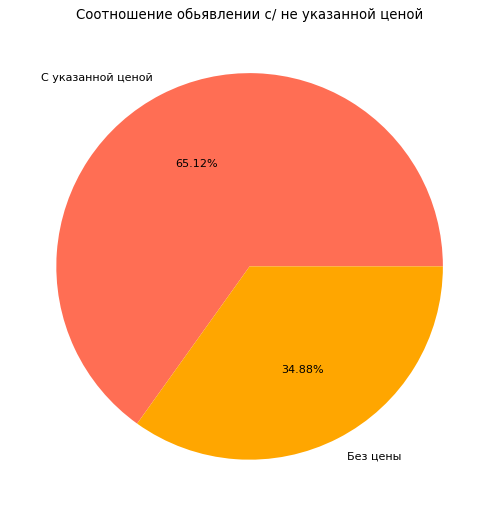

In [43]:
l = [6315, 3383]
n = ['С указанной ценой', 'Без цены']
plt.figure(figsize=(8, 8), dpi = 80)

cols = ["#ffa600", "#ff6e54"]

plt.title('Соотношение обьявлении с/ не указанной ценой')


plt.pie(l, labels = n, colors = cols[::-1], autopct='%1.2f%%')


plt.savefig("ratio_price.png", bbox_inches = "tight", pad_inches = 1)

plt.show()

In [57]:
by_cat = has_price.groupby('Category')

med_price = by_cat.count()['Title']

med_price


prices = has_price.groupby('Category').median()['Price']

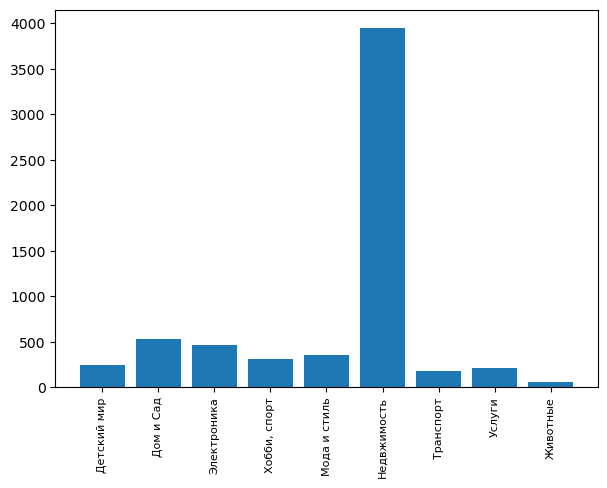

In [53]:
plt.figure(figsize=(7,5), dpi = 100)

keys = ['Детский мир', 'Дом и Сад', 'Электроника', 'Хобби, спорт', 'Мода и стиль', 'Недвжимость', 'Транспорт', 'Услуги', 'Животные']
plt.bar(keys, med_price)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

<ipython-input-61-4992c6d8aac7>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


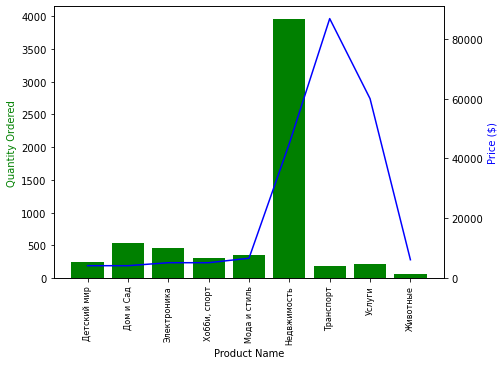

In [61]:
fig, ax1 = plt.subplots(figsize=(7, 5))

ax2 = ax1.twinx()
ax1.bar(keys, med_price, color='g')
ax2.plot(keys, prices, color='b')



ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

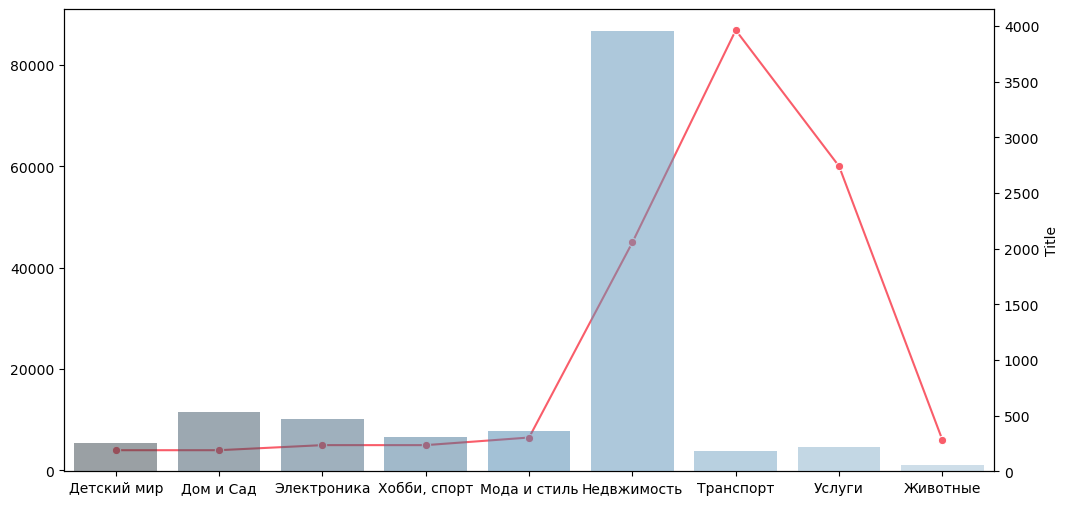

In [74]:

matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = prices, marker='o', sort = False, ax=ax1, color = '#f95d6a')
ax2 = ax1.twinx()

colors = ['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087', '#f95d6a', '#ff7c43', '#ffa600', '#CAF270']
    
sns.barplot(keys, med_price, alpha=0.5, ax=ax2,  palette="Blues_d")

plt.savefig("price_quan.png", bbox_inches = "tight", pad_inches = 1)